In [1]:
import xarray as xr

In [2]:
!curl -O https://zenodo.org/record/3755721/files/FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_T.nc

In [3]:
file_name = "FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_T.nc"

In [11]:
data_set = xr.open_dataset(file_name)
data_set

<xarray.Dataset>
Dimensions:               (y: 511, x: 722, deptht: 46, axis_nbounds: 2,
                           time_counter: 12)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 3.047 9.454 ... 5.625e+03 5.875e+03
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2011-01-16T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/17)
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sosstsst              (time_counter, y, x) float32 ...
    ...                    ...
    somxl010              (time_counter, y, x) float32 ...
    somixhgt              (time_counter, y, x) float32 ...
    sowindsp              (time_counter, y, x) float32 ...
    sohefldp              (time_counter, y, x) float32 ...
    sowafldp              (time_counter, y, x) float32 ...
    sobowlin              (time_counter, y, x) float32 ...
Attributes:
    name:         FOCI1.14-JH024_1m_20110101_20111231
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2019-Apr-17 18:02:10 CEST
    history:      Wed Apr 17 18:47:54 2019: ncks -7 -a -L 1 --cnk_dmn time,1 ...
    NCO:          4.4.8

In [5]:
# %%time

# data_set.max()

In [6]:
# data_set_loaded = data_set.load()

In [10]:
data_set_chunked = xr.open_dataset(file_name, chunks={"deptht": 1})
data_set_chunked

<xarray.Dataset>
Dimensions:               (y: 511, x: 722, deptht: 46, axis_nbounds: 2,
                           time_counter: 12)
Coordinates:
    nav_lat               (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(511, 722), meta=np.ndarray>
  * deptht                (deptht) float32 3.047 9.454 ... 5.625e+03 5.875e+03
    time_centered         (time_counter) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
  * time_counter          (time_counter) datetime64[ns] 2011-01-16T12:00:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/17)
    deptht_bounds         (deptht, axis_nbounds) float32 dask.array<chunksize=(1, 2), meta=np.ndarray>
    votemper              (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 1, 511, 722), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    vosaline              (time_counter, deptht, y, x) float32 dask.array<chunksize=(12, 1, 511, 722), meta=np.ndarray>
    sosstsst              (time_counter, y, x) float32 dask.array<chunksize=(12, 511, 722), meta=np.ndarray>
    ...                    ...
    somxl010              (time_counter, y, x) float32 dask.array<chunksize=(12, 511, 722), meta=np.ndarray>
    somixhgt              (time_counter, y, x) float32 dask.array<chunksize=(12, 511, 722), meta=np.ndarray>
    sowindsp              (time_counter, y, x) float32 dask.array<chunksize=(12, 511, 722), meta=np.ndarray>
    sohefldp              (time_counter, y, x) float32 dask.array<chunksize=(12, 511, 722), meta=np.ndarray>
    sowafldp              (time_counter, y, x) float32 dask.array<chunksize=(12, 511, 722), meta=np.ndarray>
    sobowlin              (time_counter, y, x) float32 dask.array<chunksize=(12, 511, 722), meta=np.ndarray>
Attributes:
    name:         FOCI1.14-JH024_1m_20110101_20111231
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2019-Apr-17 18:02:10 CEST
    history:      Wed Apr 17 18:47:54 2019: ncks -7 -a -L 1 --cnk_dmn time,1 ...
    NCO:          4.4.8

In [12]:
data_set.votemper.mean(["time_counter", "y", "x"])

<xarray.DataArray 'votemper' (deptht: 46)>
array([7.1152296 , 7.067727  , 7.0170197 , 6.8778496 , 6.7446957 ,
       6.5910373 , 6.414731  , 6.212901  , 5.995316  , 5.7705994 ,
       5.550148  , 5.343946  , 5.15171   , 4.9302835 , 4.6990867 ,
       4.471048  , 4.25023   , 4.033019  , 3.80701   , 3.5609603 ,
       3.2799919 , 2.961413  , 2.6118762 , 2.263535  , 1.9444554 ,
       1.6982495 , 1.5344212 , 1.4260108 , 1.3464472 , 1.2775284 ,
       1.2068273 , 1.1354522 , 1.058902  , 0.9727525 , 0.88258094,
       0.7893466 , 0.6947323 , 0.60045344, 0.5069336 , 0.41298676,
       0.32169244, 0.24011283, 0.16260287, 0.09207101, 0.04334885,
       0.        ], dtype=float32)
Coordinates:
  * deptht   (deptht) float32 3.047 9.454 16.36 ... 5.625e+03 5.875e+03

In [13]:
data_set_chunked.votemper.mean(["time_counter", "y", "x"])

<xarray.DataArray 'votemper' (deptht: 46)>
dask.array<mean_agg-aggregate, shape=(46,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * deptht   (deptht) float32 3.047 9.454 16.36 ... 5.625e+03 5.875e+03

In [15]:
data_set_chunked.votemper.mean(["time_counter", "y", "x"]).compute()

<xarray.DataArray 'votemper' (deptht: 46)>
array([7.1152315 , 7.067719  , 7.0170217 , 6.8778543 , 6.7446995 ,
       6.5910344 , 6.4147286 , 6.2128987 , 5.995313  , 5.7706017 ,
       5.550148  , 5.3439445 , 5.151713  , 4.930284  , 4.699086  ,
       4.4710474 , 4.2502303 , 4.033018  , 3.8070107 , 3.560959  ,
       3.2799928 , 2.9614124 , 2.611878  , 2.2635357 , 1.9444551 ,
       1.6982491 , 1.5344213 , 1.4260113 , 1.3464477 , 1.2775288 ,
       1.2068292 , 1.1354529 , 1.058902  , 0.97275215, 0.88258106,
       0.78934664, 0.6947325 , 0.60045373, 0.50693417, 0.41298655,
       0.3216924 , 0.24011275, 0.16260293, 0.09207103, 0.04334885,
       0.        ], dtype=float32)
Coordinates:
  * deptht   (deptht) float32 3.047 9.454 16.36 ... 5.625e+03 5.875e+03

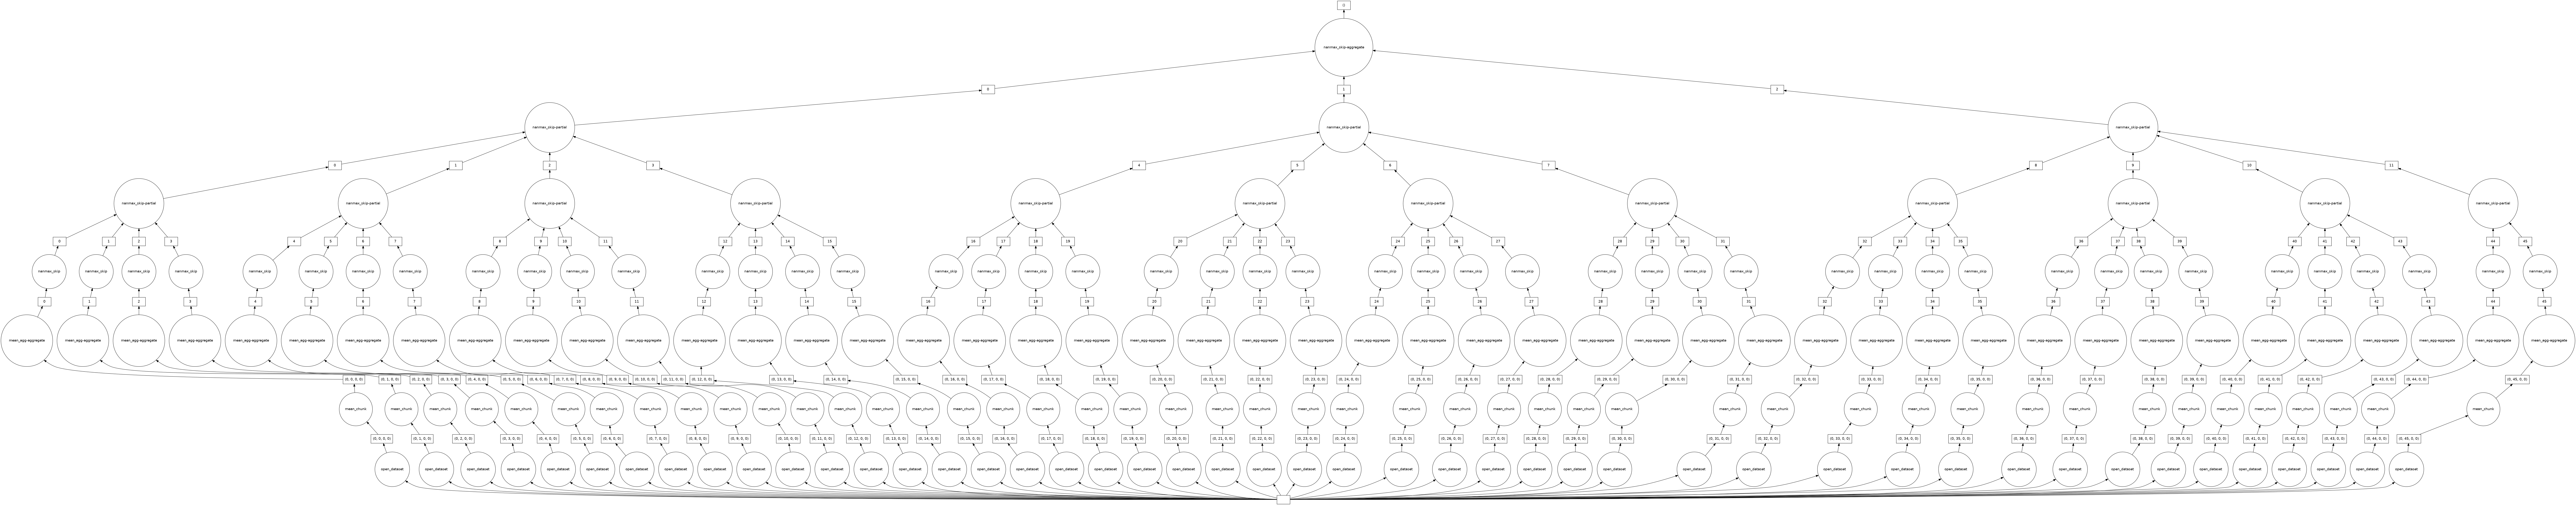

In [21]:
data_set_chunked.votemper.mean(["time_counter", "y", "x"]).max().data.visualize()

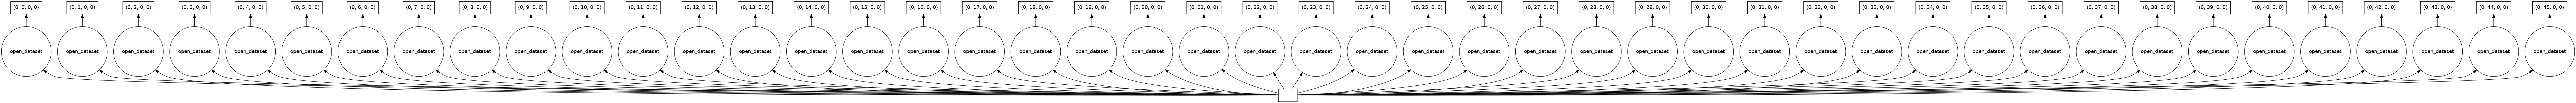

In [ ]:
data_set_chunked.votemper.data.visualize()